In [4]:
from utils import *
from metadata import *
from gen_imglst import * 
from vis_utils import * 
import utils
import tensorflow as tf
# utils.init_dev(utils.get_dev())
# utils.allow_growth()

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib

In [5]:
%cd /home/wangxinglu/prj/few-shot/src

/mnt/nfs1703/test/prj/few-shot/src


In [31]:
%run two_level.py

500
500
761
822
961
1157
1381
1529
1615
1652
1667
1680


In [67]:
len(fine),len(coarse)
# fine=fine[:2]
# coarse=coarse[:2]

(2, 2)

In [42]:
d=unpickle('d.pkl')
nimgs=unpickle('nimgs.pkl')

In [68]:
names=np.concatenate(np.array(fine)).tolist()
name2fine={v:k for k,v in enumerate(names)}
fine2coarseind={}
ind=0
for fs,c in zip(fine,coarse):
    for f in fs:
        fine2coarseind[f]=ind
    ind+=1    
name2coarse={}
for k,v in enumerate(names):
    name2coarse[v]=fine2coarseind[v]

In [71]:
fine,coarse,name2fine,name2coarse

([[u'n08596076', u'n09428628', u'n09335693', u'n09458269', u'n09447666'],
  [u'n09274152',
   u'n09228055',
   u'n09415584',
   u'n09233603',
   u'n09361517',
   u'n09445008',
   u'n09436444']],
 [u'n09433442', u'n09437454'],
 {u'n08596076': 0,
  u'n09228055': 6,
  u'n09233603': 8,
  u'n09274152': 5,
  u'n09335693': 2,
  u'n09361517': 9,
  u'n09415584': 7,
  u'n09428628': 1,
  u'n09436444': 11,
  u'n09445008': 10,
  u'n09447666': 4,
  u'n09458269': 3},
 {u'n08596076': 0,
  u'n09228055': 1,
  u'n09233603': 1,
  u'n09274152': 1,
  u'n09335693': 0,
  u'n09361517': 1,
  u'n09415584': 1,
  u'n09428628': 0,
  u'n09436444': 1,
  u'n09445008': 1,
  u'n09447666': 0,
  u'n09458269': 0})

In [ ]:
train_file = HOME + '/prj/few-shot/data/imglst/img10k.test.twolevel'
test_file = HOME + '/prj/few-shot/data/imglst/img10k.test.twolevel'
prefix = HOME + '/prj/few-shot/data/imagenet-raw'

@chdir_to_root
def gen_imglst(names, prefix, train_file, test_file):
    os.chdir(prefix)
    imgs_train_l, imgs_test_l = [], []
    for ind, cls in enumerate(names):
        if not osp.exists(cls): continue
#         imgs = tf.gfile.Glob(cls + '/*.JPEG')
        imgs = [cls+'/'+img_ for img_ in d[cls]]
        if len(imgs) == 0:
            utils.rm(cls, True)
            continue
        assert len(imgs) >= 10
        imgs = np.array(imgs)
        imgs_test = np.random.choice(imgs, max(3, imgs.shape[0] * 1 // 10), replace=False)
        imgs_train = np.setdiff1d(imgs, imgs_test)

        imgs_train_l.append(
            np.stack((imgs_train, np.ones_like(imgs_train, dtype=int) * ind), axis=-1)
        )
        imgs_test_l.append(
            np.stack((imgs_test, np.ones_like(imgs_test, dtype=int) * ind), axis=-1)
        )

    imgs_train = np.concatenate(imgs_train_l, axis=0)
    np.random.shuffle(imgs_train)

    np.savetxt(train_file, imgs_train, delimiter=' ', fmt='%s')
    np.savetxt(test_file, np.concatenate(imgs_test_l, axis=0), delimiter=' ', fmt='%s')

gen_imglst(names, prefix, train_file, test_file)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    1.,    1.,    1.,    0.,  117.,  137.,  130.,   95.,
         104.,   87.,   76.,   97.,   87.,   79.,   74.,   57.,   42.,
          37.,   47.,   46.,   37.,   18.,   18.,   18.,   14.,   10.,
           7.,   15.,    4.,   10.,   10.,    7.,   12.,    7.,    8.,
           2.,    7.,    5.,    9.,    5.,    2.,    3.,    6.,    1.,
           6.,    1.,    5.,    4.,    3.,    3.,    8.,    5.,    4.,
           4.,    5.,    5.,    9.,    1.,    6.,   10.,    7.,    3.,
           1.,    1.,    1.,    5.,    5.,    5.,    3.,    6.,    4.,    9.]),
 array([  123.  ,   196.58,   270.16,   343.74,   417.32,   490.9 ,
          564.48,   638.06,   711.64,   785.22,   858.8 ,   932.38,
         1005.96,  1079.54,  1153.12,  1226.7 ,  1300.28,  1373.86,
      

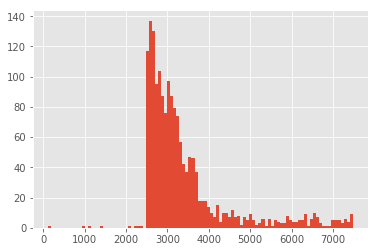

In [191]:
plt.hist(sav,bins=100)

In [179]:
tree=nx.DiGraph()
for c,fs in zip(coarse,fine):
    tree.add_edge('fall11',c)
    for f in fs: 
        tree.add_edge(c,f)

In [180]:
tree

In [181]:
from vis_utils import * 
vis_nx(tree)

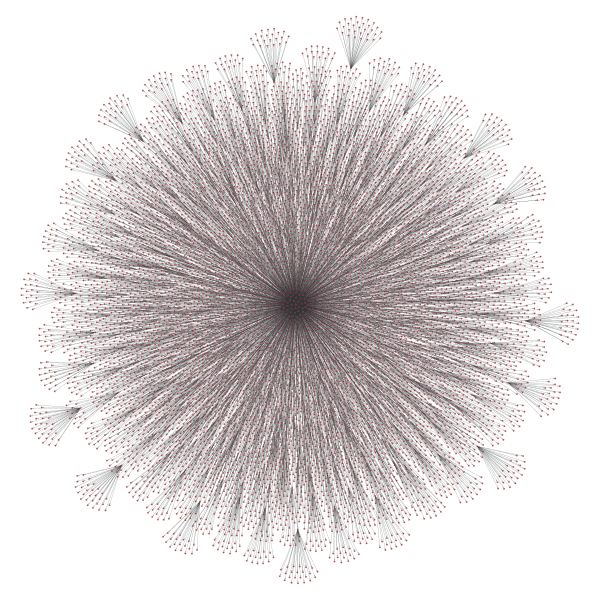

In [182]:
show_img('tmp.png')

In [142]:
nxgraph=tree

nx.write_gml(nxgraph, 'tmp.gml')
g = load_graph('tmp.gml')

graph_draw(g,pos=radial_tree_layout(g,4263),output='tmp.png')

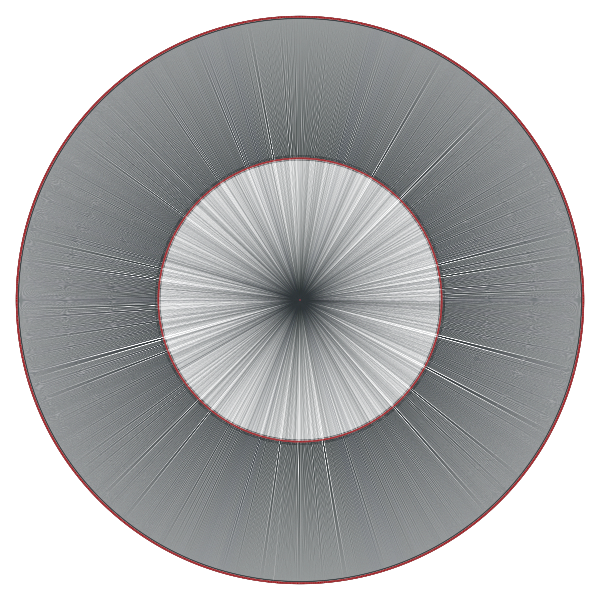

In [166]:
show_img('tmp.png')

In [174]:
t=[np.array(tt) for tt in fine]

In [175]:
final = np.concatenate(t,axis=0)
final.shape
np.unique(final).shape

(9999,)

(9999,)

In [172]:
tree=nx.read_gml('tree.gml')
len(find_child(tree,'fall11'))

9999

In [183]:
tree

In [184]:
tag_tree(tree)

In [185]:
tree2=_

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.69500000e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          8.80300000e+03]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

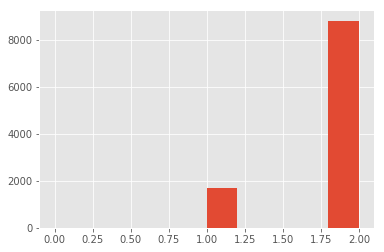

In [187]:
plt.hist(tree2.all_depth)

(array([  56.,  197.,  654.,  256.,  312.,   79.,   74.,   20.,   16.,
           7.,    7.,    1.,    4.,    1.,    6.,    0.,    2.,    0.,
           1.,    2.]),
 array([  1. ,   2.5,   4. ,   5.5,   7. ,   8.5,  10. ,  11.5,  13. ,
         14.5,  16. ,  17.5,  19. ,  20.5,  22. ,  23.5,  25. ,  26.5,
         28. ,  29.5,  31. ]),
 <a list of 20 Patch objects>)

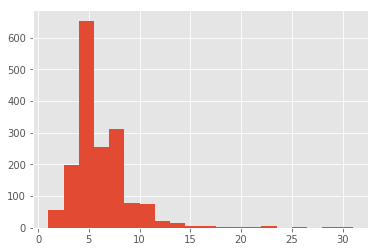

In [203]:
t=tree2.all_nchild
t=np.array(t)
# t=t[t!=1]
t=t[t!=0]
t=t[t<250]
plt.hist(t,bins=20)

In [7]:
def two_level(thresh):
    cls=[]
    fls=[]

    tree_ =slim_tree(tree,condition=imagenet10k)


    for node in nx.dfs_preorder_nodes(tree_, 'fall11'):
        depth = tree_.node[node]['depth']
        nchild= tree_.node[node]['nchild'] 
        if (depth<=thresh and nchild==0) :
            cls.append(node) 
            fls.append([node]) 
        elif (depth>=thresh and nchild!=0):
            cls.append(node) 
            fls.append(find_child(tree_,node)) 


    len(cls)
    len(fls)

    g=nx.DiGraph()
    for fl,cl in zip(fls,cls):
        g.add_edge('fall11',cl)
        for fl_ in fl:
            g.add_edge(cl,fl_)


    tag_tree(g)

    vis_nx(g)
    return g 

In [11]:
def nx2graph(nxgraph):
    nx.write_gml(nxgraph,'tmp.gml')
    g=load_graph('tmp.gml')
    return g 

In [8]:
def vis_graph(nxgraph):
    if isinstance(nxgraph,nx.DiGraph):
        g=nx2graph(nxgraph)
    else:
        g=nxgraph
    graph_draw(g,pos=sfdp_layout(g),
               vertex_color=[1,1,1,0],
#                vertex_fill_color=
#                vertex_size=1,
               edge_pen_width=.09,
#                vcmap=matplotlib.cm.winter,
               output='tmp.png')
# graph_draw(g,pos=radial_tree_layout(g,5561),
#                vertex_color=[1,1,1,0],
# #                vertex_fill_color=
# #                vertex_size=1,
#                edge_pen_width=.09,
# #                vcmap=matplotlib.cm.winter,
#                output='tmp.png')

In [51]:
ad=g.all_depth 
ad=np.array(ad)
len(ad[ad==1])

6415

In [9]:
g=two_level(4)

In [12]:
vis_graph(g)

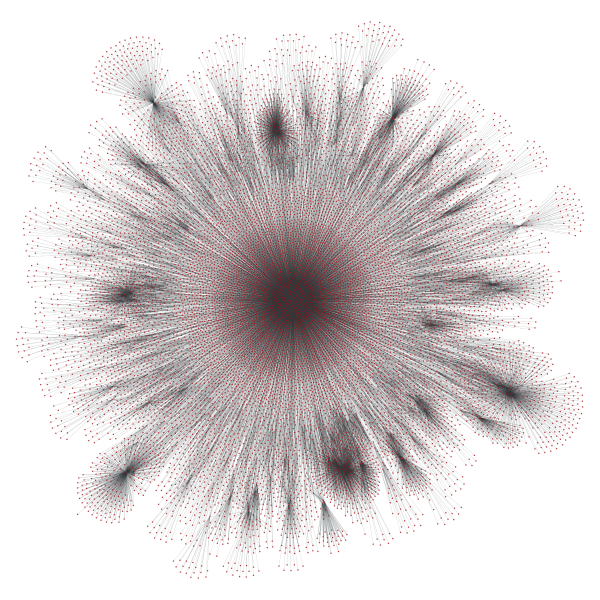

In [16]:
show_img('tmp.png')

(array([  6.41500000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   6.42400000e+02,   1.28380000e+03,
          1.92520000e+03,   2.56660000e+03,   3.20800000e+03,
          3.84940000e+03,   4.49080000e+03,   5.13220000e+03,
          5.77360000e+03,   6.41500000e+03]),
 <a list of 10 Patch objects>)

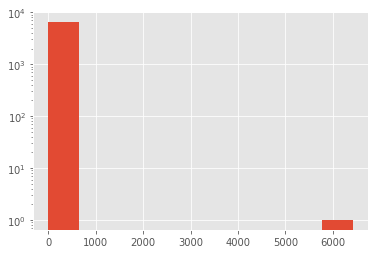

In [43]:
ac=g.all_nchild
ac=np.array(ac)
ac=ac[ac!=0]
plt.hist(ac)
plt.yscale('log')

(array([ 4466.,   686.,   350.,   224.,   133.,    90.,    62.,    52.,
           40.,    34.,    23.,    30.,    19.,    13.,    14.,    12.,
           10.,    11.,    12.]),
 array([  1.        ,   1.94736842,   2.89473684,   3.84210526,
          4.78947368,   5.73684211,   6.68421053,   7.63157895,
          8.57894737,   9.52631579,  10.47368421,  11.42105263,
         12.36842105,  13.31578947,  14.26315789,  15.21052632,
         16.15789474,  17.10526316,  18.05263158,  19.        ]),
 <a list of 19 Patch objects>)

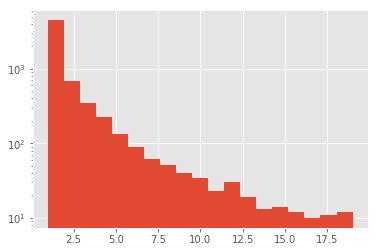

In [48]:
anc=np.array(g.all_nchild)
anc=anc[anc<20]
anc=anc[anc!=0]
plt.hist(anc,bins=19)
plt.yscale('log')

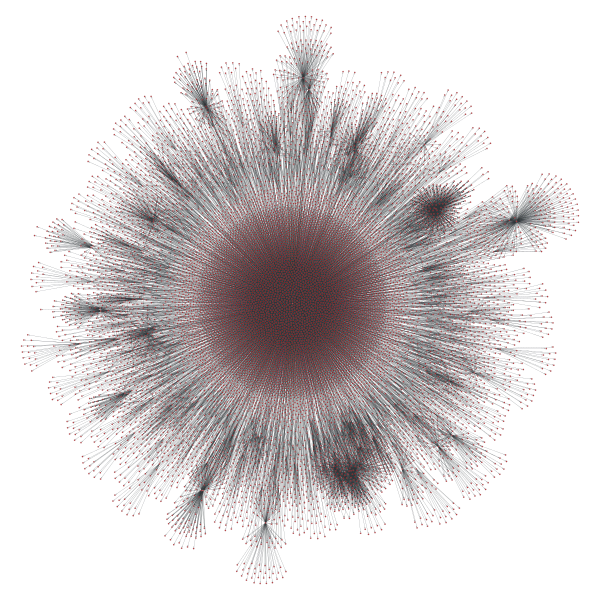

In [6]:
two_level(5)

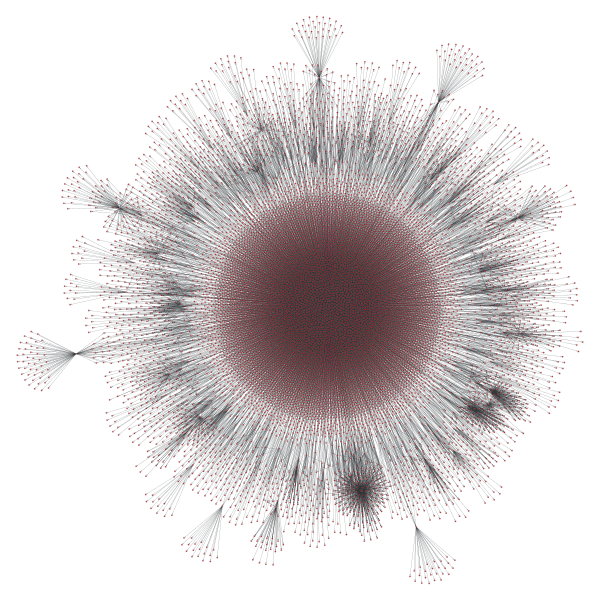

In [7]:
two_level(6)

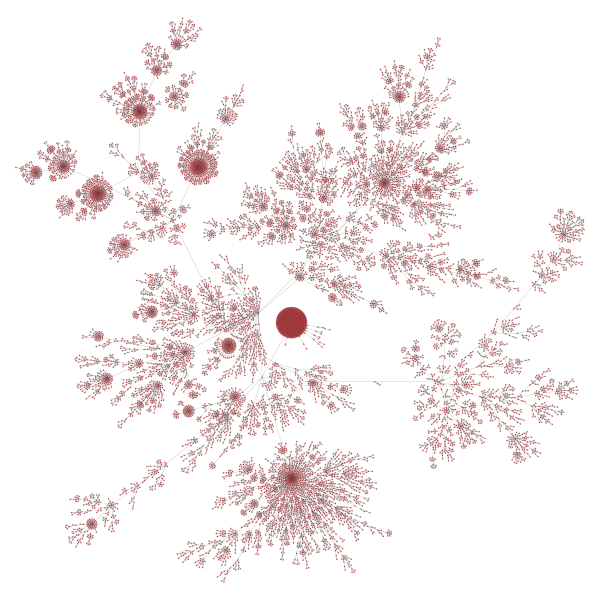

In [79]:
from vis_utils import * 
vis_nx(tree_)

In [20]:
from gen_imglst import * 
len(find_child(tree_,'fall11',False))

9999

In [34]:
leaves=find_child(tree_,'fall11',False) 
leaves=np.sort(leaves)

In [35]:
imagenet10k=np.sort(imagenet10k)

In [36]:
np.setdiff1d(imagenet10k,leaves)

array(['n02654425'],
      dtype='|S9')

In [93]:
depths=[]
nimgsn=[]

In [86]:
from metadata import * 
%pwd

%cd /home/wangxinglu/prj/few-shot/src

nimgs=unpickle('./nimgs.pkl')

u'/mnt/nfs1703/test/prj/few-shot'

/mnt/nfs1703/test/prj/few-shot/src


In [94]:
for node in nx.dfs_preorder_nodes(tree_,'fall11'):
#     print node
    if tree_.node[node]['nchild']==0:
        depths.append(tree_.node[node]['depth']) 
        nimgsn.append(nimgs[node])

In [95]:
len(depths)
len(nimgsn)

9999

9999

11

In [116]:
min(depths),max(depths)

(2, 12)

In [117]:
means=[]
stds=[]
nimgsn=np.array(nimgsn)
depths=np.array(depths)
for d in range(min(depths),max(depths)+1):
    w=nimgsn[depths==d]
    
    means.append(np.mean(w))
    stds.append(np.std(w))

In [118]:
means,stds

([567.00954478707786,
  497.47695852534559,
  529.21124206708976,
  544.02915291529155,
  592.35744016649323,
  587.4849498327759,
  590.09888888888884,
  655.09036144578317,
  589.49009900990097,
  640.10919540229884,
  557.01098901098896],
 [453.96028347103521,
  498.10478666777379,
  491.89819003208731,
  481.13684328513978,
  486.73074553239081,
  477.4687266099732,
  477.08458625615845,
  484.4160500081432,
  482.83796187408763,
  479.76067384511435,
  455.80286597003141])

In [12]:
means,stds = ( [567.00954478707786,
  497.47695852534559,
  529.21124206708976,
  544.02915291529155,
  592.35744016649323,
  587.4849498327759,
  590.09888888888884,
  655.09036144578317,
  589.49009900990097,
  640.10919540229884,
  557.01098901098896],
 [453.96028347103521,
  498.10478666777379,
  491.89819003208731,
  481.13684328513978,
  486.73074553239081,
  477.4687266099732,
  477.08458625615845,
  484.4160500081432,
  482.83796187408763,
  479.76067384511435,
  455.80286597003141])

<Container object of 3 artists>

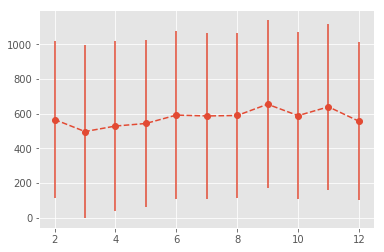

In [15]:
plt.errorbar(np.arange(2,13),means,yerr=stds,fmt='--o')

In [113]:
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)a
a

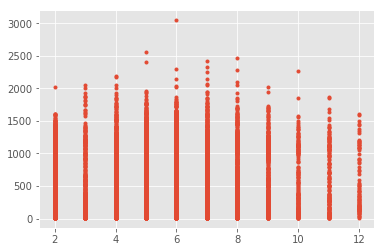

In [98]:
plt.plot(depths,nimgsn,'.')